In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [15]:
data = pd.read_csv('data_eprc.csv')

In [16]:
data['price']

0        7.760000
1        1.760000
2        3.323000
3        1.726000
4        8.479999
           ...   
79527    5.511000
79528    4.623000
79529    8.000000
79530    3.782000
79531    4.098000
Name: price, Length: 79532, dtype: float64

In [17]:
data.price

0        7.760000
1        1.760000
2        3.323000
3        1.726000
4        8.479999
           ...   
79527    5.511000
79528    4.623000
79529    8.000000
79530    3.782000
79531    4.098000
Name: price, Length: 79532, dtype: float64

#### Scatterplot()

<Axes: xlabel='floor', ylabel='price'>

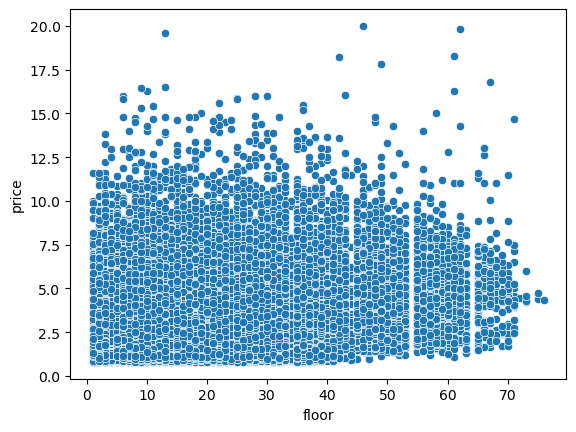

In [4]:
sns.scatterplot(y = data.price, x = data.floor)

#### Jointplot()

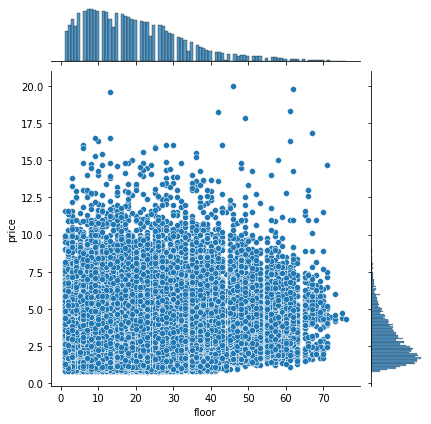

In [4]:
sns.jointplot(y = data.price, x = data.floor)

#### Lineplot()

<AxesSubplot:xlabel='floor', ylabel='price'>

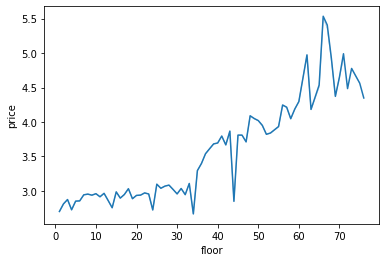

In [5]:
sns.lineplot(y = data.price, x = data.floor, ci=False)

### <font color='red'>Tip 4: How to present the effect of superstition in a clear manner?</font>
> Less is more.  In this case, we regroup the samples based on the ending number of floor level.

#### Generate a new column in data

In [7]:
data['f'] = data.floor % 10

C:\Users\user\AppData\Local\Temp\ipykernel_10432\4070635088.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(y = data.price, x = data.f, ci=None)


<Axes: xlabel='f', ylabel='price'>

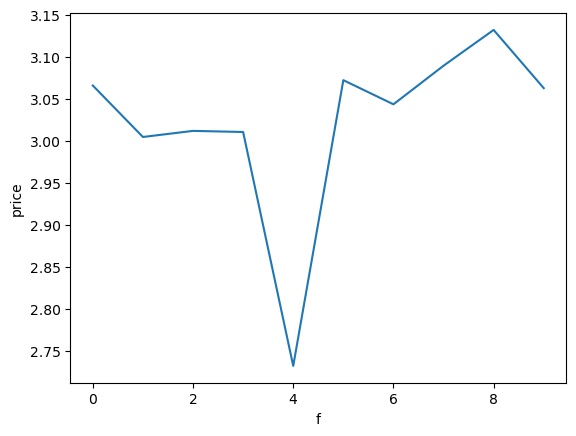

In [9]:
sns.lineplot(y = data.price, x = data.f, ci=None)

#### Color
https://matplotlib.org/stable/gallery/color/named_colors.html
#### Linestyle
https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
#### Marker
https://matplotlib.org/stable/api/markers_api.html

C:\Users\user\AppData\Local\Temp\ipykernel_10432\2103318998.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(y = data.price, x = data.f, ci=None,


Text(0.5, 0, 'Ending number of floor level')

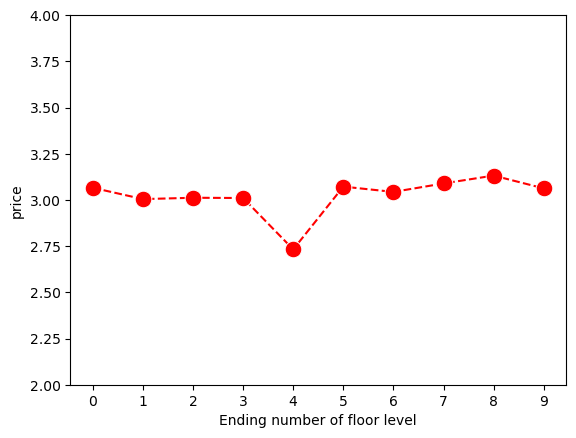

In [10]:
sns.lineplot(y = data.price, x = data.f, ci=None, 
             linestyle='dashed',color='red',marker='o',markersize='12')
plt.ylim(2,4)
plt.xticks(np.arange(0,10,1))
plt.xlabel('Ending number of floor level')

### <font color='red'>Tip 5: How to explore more about the relationship between two variables?</font>
> Subgroup comparison analysis
>> * Subgroup comparison analysis involves splitting all the data into subgroups and make comparisons
>> * We can divide a dataset into subgroups based on time periods (market boom and market bust), or locations (rural and urban), or demographical characteristics (rich and poor).

In this case, we divide dataset based on time periods.

C:\Users\user\AppData\Local\Temp\ipykernel_10432\3174402817.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(y = data.price, x = data.year, ci=False)


<Axes: xlabel='year', ylabel='price'>

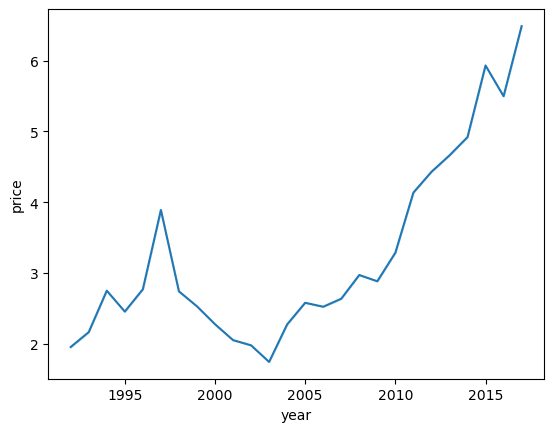

In [11]:
sns.lineplot(y = data.price, x = data.year, ci=False)

#### Generate two subgroups

In [12]:
data1 = data[(data.idate>='1996-01-01') & (data.idate<'1997-07-01')]

data2 = data[(data.idate>='1997-07-01') & (data.idate<'1998-12-01')]

#### Subplot()

C:\Users\user\AppData\Local\Temp\ipykernel_10432\3807363246.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(y = data1.price, x = data1.f, ci=None, label='Bullish Market',
C:\Users\user\AppData\Local\Temp\ipykernel_10432\3807363246.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(y = data2.price, x = data2.f, ci=None, label='Bearish Market',


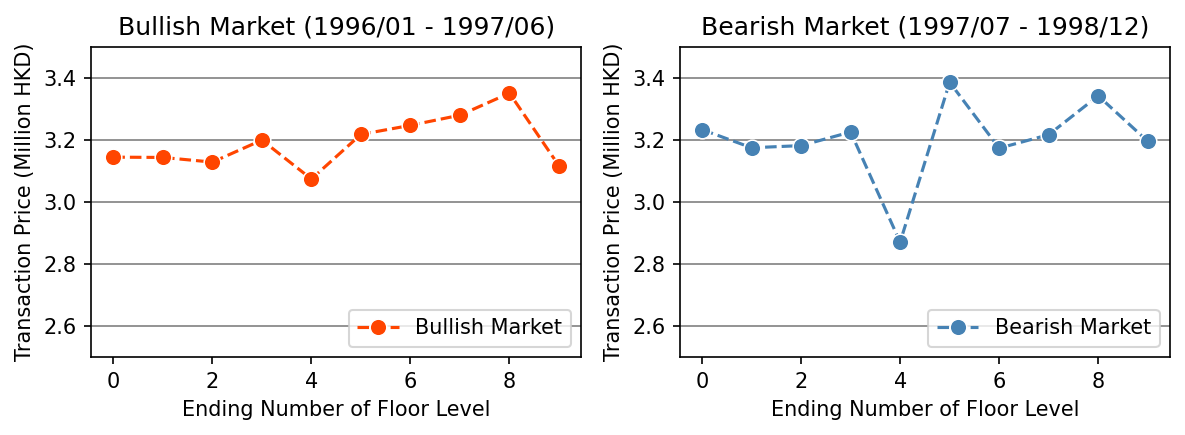

In [13]:
plt.figure(figsize=(8,3),dpi=150)

plt.subplot(1,2,1)
sns.lineplot(y = data1.price, x = data1.f, ci=None, label='Bullish Market',
        linestyle='dashed',color='orangered',marker='o',markersize='8')
plt.legend(loc='lower right')
plt.ylim(2.5,3.5)
plt.grid(axis='y',visible=True, color='grey')
plt.ylabel('Transaction Price (Million HKD)')
plt.xlabel('Ending Number of Floor Level')
plt.title('Bullish Market (1996/01 - 1997/06)')


plt.subplot(1,2,2)
sns.lineplot(y = data2.price, x = data2.f, ci=None, label='Bearish Market',
        linestyle='dashed',color='steelblue',marker='o',markersize='8')
plt.ylim(2.5,3.5)
plt.grid(axis='y',visible=True, color='grey')
plt.ylabel('Transaction Price (Million HKD)')
plt.xlabel('Ending Number of Floor Level')
plt.title('Bearish Market (1997/07 - 1998/12)')
plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig('The heterogeneous effects of superstition on housing price',dpi=300)

#### pivot_table()
A useful function in pandas

In [25]:
pd.pivot_table(data, values='price', index='f', aggfunc=np.mean)

,price
f,
0,3.065614
1,3.004445
2,3.011700
3,3.010367
4,2.732258
5,3.072013
6,3.043299
7,3.089165
8,3.131734


In [15]:
pd.pivot_table(data, values='price', index='f', aggfunc=np.median)

,price
f,
0,2.645
1,2.570
2,2.580
3,2.569
4,2.270
5,2.605
6,2.600
7,2.634
8,2.680


#### Thus, we find a more flexible way to generate graphs 
> sns.lineplot() can only calculate mean of Y variable.
>
> But with pivot_table(), you can present the relationship between any statistics of Y variable with X variable.  Just change the aggfunc accordingly.  

<AxesSubplot:xlabel='f', ylabel='price'>

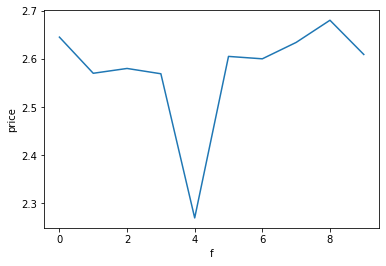

In [18]:
table = pd.pivot_table(data, values='price', index='f', aggfunc=np.median)
sns.lineplot(y = table.price, x = table.index, ci=None)

Other examples of pivot_table()

In [21]:
table = pd.pivot_table(data, values='price', index='ename', aggfunc='count')

In [20]:
table

,price
ename,
ABERDEEN CTR,435
ACADEMIC TERR,143
AEGEAN COAST,367
ALLWAY GDN,542
AMOY GDN,1269
...,...
WHAMPOA GDNY,6
WONDERLAND VILLAS,190
YOHO MIDTOWN,226


In [24]:
table.to_csv('Number of observations by ENAME.csv')